Öncelikle kütüphanelerimizi dahil ettik.

In [ ]:
from google.colab import files
import io
import pandas as pd

Veri setimizi ekledik.

In [ ]:
uploaded = files.upload()


Saving train.csv to train.csv


Yüklenen CSV dosyasını okuyup DataFrame oluşturduk.

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [ ]:
print(df.head()) #ilk 5 satır

   bedroom  bathrooms    area     furnishing                   avalable_for  \
0        2          2  1050.0    Unfurnished                            All   
1        2          2   760.0    Unfurnished                            All   
2        3          3     0.0  Semifurnished                            All   
3        1          1   628.0      Furnished                    Family Only   
4        2          2   668.0  Semifurnished  Family , Bachelors (Men Only)   

                                             address  floor_number  \
0  Sadguru hights, Pingale Wasti, , Pune, Maharas...             5   
1  Manav Silver Springs, Wagholi, , Pune, Maharas...             5   
2  Saarrthi Souvenir, Mahalunge, , Pune, Maharashtra             1   
3      Dhan Residency, Wanowrie, , Pune, Maharashtra             3   
4  Saptsiddhi Savali Homes, Uruli Devachi, , Pune...             6   

       facing         floor_type gate_community  ... pooja_room  study_room  \
0        West            

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10884 entries, 0 to 10883
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedroom            10884 non-null  int64  
 1   bathrooms          10884 non-null  int64  
 2   area               10884 non-null  float64
 3   furnishing         10884 non-null  object 
 4   avalable_for       10854 non-null  object 
 5   address            10884 non-null  object 
 6   floor_number       10884 non-null  int64  
 7   facing             10884 non-null  object 
 8   floor_type         10884 non-null  object 
 9   gate_community     10884 non-null  object 
 10  corner_pro         10884 non-null  object 
 11  parking            10884 non-null  int64  
 12  wheelchairadption  1944 non-null   object 
 13  petfacility        2426 non-null   object 
 14  aggDur             10884 non-null  int64  
 15  noticeDur          10884 non-null  int64  
 16  lightbill          108

In [ ]:
print(df.describe())

            bedroom     bathrooms          area  floor_number       parking  \
count  10884.000000  10884.000000  10884.000000  10884.000000  10884.000000   
mean       1.797868      1.779677    528.558560      3.062018      0.884693   
std        0.807328      0.832231    930.460935      2.390430      0.559457   
min        1.000000      1.000000      0.000000      0.000000      0.000000   
25%        1.000000      1.000000      0.000000      1.000000      1.000000   
50%        2.000000      2.000000    510.000000      3.000000      1.000000   
75%        2.000000      2.000000    840.000000      5.000000      1.000000   
max       22.000000     22.000000  72775.000000      9.000000      9.000000   

             aggDur     noticeDur     lightbill   powerbackup       no_room  \
count  10884.000000  10884.000000  10884.000000  10884.000000  10884.000000   
mean       7.423649      0.722345      0.172639      0.712422      0.750276   
std        7.670543      0.698966      0.377952    

In [ ]:
zero_area_count = (df['area'] == 0).sum()
print(f"'area' sütununda sıfır olan kayıt sayısı: {zero_area_count}") #veri temizleme aşamasında bazı kısımlara göz atalım

'area' sütununda sıfır olan kayıt sayısı: 4052


In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
X = df_encoded.drop('rent', axis=1)
y = df_encoded['rent']


 Area sütununda sıfır olanları, sıfır olmayanların ortalamasıyla doldurduk.Çünkü çok fazla satır sıfırdı ve eğer silseydik de verimli olmazdı.

In [ ]:
area_mean = df.loc[df['area'] > 0, 'area'].mean()
df.loc[df['area'] == 0, 'area'] = area_mean

print(f"Yeni area ortalaması: {df['area'].mean()}")
print(f"Area'da sıfır kalan kayıt sayısı: {(df['area'] == 0).sum()}")


Yeni area ortalaması: 842.04206235363
Area'da sıfır kalan kayıt sayısı: 0


Bedroom ve Bathrooms için üst sınır 8 koyduk. %99 üst sınırlarını hesapladık.

In [ ]:

rent_upper = df['rent'].quantile(0.99)
area_upper = df['area'].quantile(0.99)


df_cleaned = df[(df['rent'] <= rent_upper) &
                (df['area'] <= area_upper) &
                (df['bedroom'] <= 8) &
                (df['bathrooms'] <= 8)]

print(f"Temizlendikten sonra veri sayısı: {len(df_cleaned)}")


Temizlendikten sonra veri sayısı: 10686


In [ ]:

df_cleaned.loc[:, 'wheelchairadption'] = df_cleaned['wheelchairadption'].fillna('No') # 'wheelchairadption' sütunundaki boşları 'No' ile doldurduk
df_cleaned.loc[:, 'petfacility'] = df_cleaned['petfacility'].fillna('No') # 'petfacility' sütunundaki boşları 'No' ile doldurduk

#Kategorik sütunları seçtik
#Bunları sayısal hale dönüştürmek için one-hot encoding uyguladık
cat_cols = ['furnishing', 'avalable_for', 'floor_type', 'gate_community', 'corner_pro',
            'wheelchairadption', 'petfacility', 'propertyage', 'facing']  # Veri setindeki kategorik değişkenler

# Kategorik sütunları one-hot encoding yöntemiyle sayısal hale getiriyoruz
df_encoded = pd.get_dummies(df_cleaned, columns=cat_cols, drop_first=True) #“Bazı sütunlar birbirini tamamen tahmin ediyorsa, bu fazladan karmaşıklık yaratır. drop_first=True ile o fazlalığı kaldırıyoruz.”

print(f"Yeni veri seti boyutu: {df_encoded.shape}") # Satır ve sütun sayısını gösteriyoruz.


Yeni veri seti boyutu: (10686, 61)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
y = df_encoded['rent']
#Bu satırda y değişkenine "rent" sütunundaki kira fiyatlarını atıyoruz.
#Yani modelimizin tahmin etmeye çalışacağı hedef değişken kira fiyatı oluyor.

In [ ]:
X = df_encoded.drop('rent', axis=1)
#Burada X değişkenine ise veri setimizdeki rent hariç tüm diğer sütunları koyuyoruz.
#Yani modelimizin kullanacağı özellikler olarak kira fiyatı dışındaki tüm bilgiler seçiliyor.

In [ ]:
X.select_dtypes(include='object').columns


Index(['address', 'maintenance_amt'], dtype='object')

In [ ]:
X = X.drop(columns=['address'])


In [ ]:
import re

def extract_amount(x):
    if isinstance(x, str):
        match = re.search(r'\d+', x)  # string içindeki ilk sayı
        if match:
            return float(match.group())
    return 0.0  # eğer sayı yoksa 0 döndür

X['maintenance_amt'] = X['maintenance_amt'].apply(extract_amount)


In [ ]:
cat_cols = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr_model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MSE: 25951895.074327644
RMSE: 5094.300253648939


ŞİMDİ RANDOM FOREST İLE BİR MODEL DENEYELİM

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

In [ ]:
# Modeli oluştur
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
rf_preds = rf_model.predict(X_test)

In [ ]:
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_mape = mean_absolute_percentage_error(y_test, rf_preds)

print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest MAPE: {rf_mape}")

Random Forest RMSE: 3794.553716538721
Random Forest MAPE: 0.18333704761754652


In [ ]:
!pip install xgboost



In [ ]:
import xgboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# Modeli oluştur
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Tahmin yap
xgb_preds = xgb_model.predict(X_test)

In [ ]:
# Değerlendirme
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
xgb_mape = mean_absolute_percentage_error(y_test, xgb_preds)

In [ ]:
print(f"XGBoost RMSE: {xgb_rmse}")
print(f"XGBoost MAPE: {xgb_mape}")

XGBoost RMSE: 3729.7691287723874
XGBoost MAPE: 0.1807658607353177


In [ ]:
import joblib

In [ ]:
# Modeli kaydet
joblib.dump(xgb_model, 'xgboost_model.joblib')

['xgboost_model.joblib']

In [ ]:
# XGBoost modeli yeniden eğit
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Kaydet
import joblib
joblib.dump(xgb_model, 'xgboost_model.joblib')


['xgboost_model.joblib']

In [ ]:
import joblib

# Modeli yükle
model = joblib.load('xgboost_model.joblib')

# Artık model ile tahmin yapabilirsiniz
# Örneğin:
# y_pred = model.predict(X_test)


In [ ]:
import pandas as pd

# sample = tahmin yapmak istediğin yeni veri (tek satır DataFrame veya dict'ten oluşturulmuş DataFrame)
sample = pd.DataFrame([{
    'bedroom': 2,
    'bathrooms': 2,
    'area': 1050,
    'furnishing': 'Unfurnished',
    'available_for': 'All',
    'address': 'Sadguru hights, Pingale Wasti, , Pune, Maharashtra',
    'floor_number': 5,
    'facing': 'West',
    'floor_type': 'Marble',
    'gate_community': 'Yes',
    'corner_pro': 'No',
    'parking': 0,
    'wheelchairadoption': 'None',
    'petfacility': None,
    'aggDur': 11,
    'noticeDur': 2,
    'lightbill': 0,
    'powerbackup': 2,
    'propertyage': '5 to 10 Year Old',
    'no_room': 1,
    'pooja_room': 0,
    'study_room': 0,
    'others': 0,
    'servant_room': 0,
    'store_room': 0,
    'maintenance_amt': 3,
    'brok_amt': 0,
    'deposit_amt': 0,
    'mnt_amt': 0
}])

# Eğer 'address' gibi çok değişkenli metin modelde kullanılmıyorsa çıkar
sample = sample.drop(columns=['address'])

# 1. One-hot encode et (modelde kullanılanla aynı şekilde)
sample_encoded = pd.get_dummies(sample)

# 2. Modeldeki tüm sütunlar (X) ile aynı olacak şekilde eksik sütunları doldur
for col in X.columns:
    if col not in sample_encoded.columns:
        sample_encoded[col] = 0

# 3. Sütun sırasını model eğitimindeki X ile eşitle
sample_encoded = sample_encoded[X.columns]

# 4. Tahmin yap
predicted_rent = model.predict(sample_encoded)
print(f"Tahmin edilen kira: ₹{predicted_rent[0]:,.2f}");


Tahmin edilen kira: ₹14,264.80


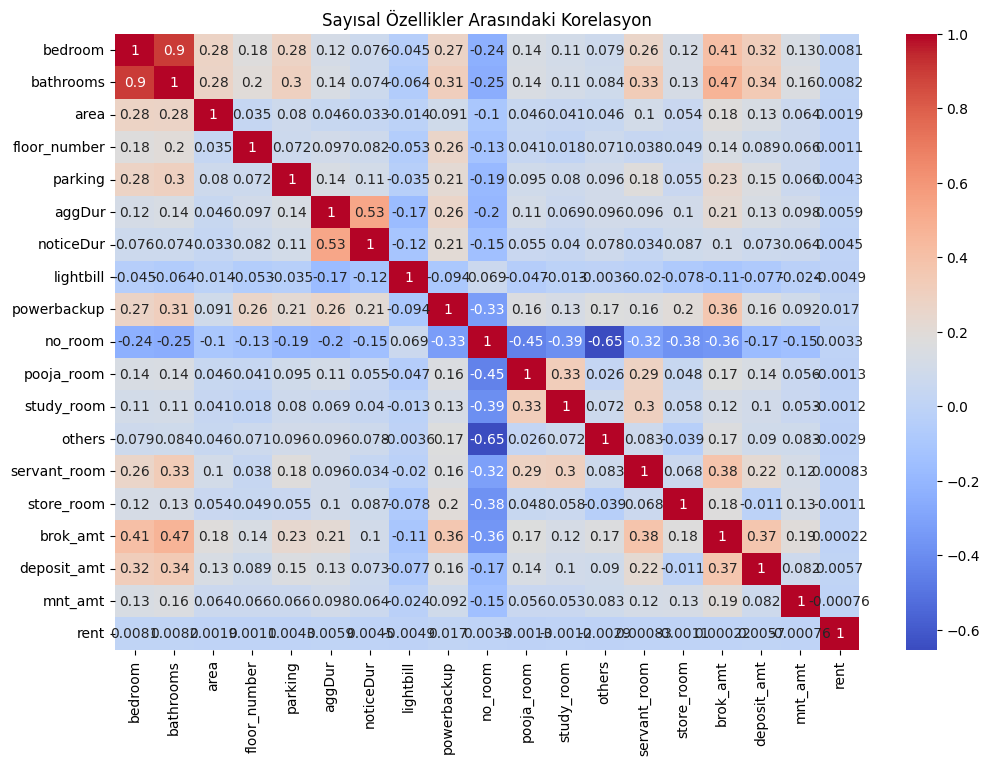

In [ ]:
# Sadece sayısal sütunları seç
numeric_df = df.select_dtypes(include=['number'])

# Korelasyon matrisi çiz
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Sayısal Özellikler Arasındaki Korelasyon")
plt.show()


Model Performans Değerlendirmesi
Modelin test verisi üzerindeki hata metrikleri:

Root Mean Squared Error (RMSE): 3729.77

Mean Absolute Percentage Error (MAPE): %18.08

Bu sonuçlara göre modelin kira tahminlerinde ortalama sapması %18 civarındadır. RMSE değeri ise yaklaşık 3.730 TL'dir. Bu, modelin tahminlerinin gerçek değerlerden daha önceki duruma göre daha düşük bir sapma ile ayrıldığını gösterir. Modelin performansı önceki değerlere kıyasla daha iyidir ve temel düzeyin üzerinde kabul edilebilir seviyededir. Yine de, öznitelik mühendisliği, hiperparametre optimizasyonu ve daha gelişmiş modeller kullanılarak doğruluk daha da artırılabilir.